In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
# Veri yükleme
file_path = '/content/drive/MyDrive/Colab Notebooks/YapayZekaOdevleri/Diyabet-Veri Seti - Diyabet-Veri Seti.csv'  # Dosya adını doğru giriniz
data = pd.read_csv(file_path)

# Eksik veya sıfır değerlerin doldurulması
columns_to_check = ['plasma', 'blood_pressure', 'skinfold_thickness', 'insulin', 'BMI']
data[columns_to_check] = data[columns_to_check].replace(0, np.nan)
data[columns_to_check] = data[columns_to_check].fillna(data[columns_to_check].median())

# Özellik ve hedef değişkenlerin ayrılması
X = data.drop(columns=['class'])
y = data['class']

# Veri setinin bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Model oluşturma
model = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),  # Gizli katman
    Dense(1, activation='sigmoid')  # Çıkış katmanı
])

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modelin eğitilmesi
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5742 - loss: 0.7513 - val_accuracy: 0.5714 - val_loss: 0.7132
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.6765 - val_accuracy: 0.5714 - val_loss: 0.6645
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6927 - loss: 0.6256 - val_accuracy: 0.6039 - val_loss: 0.6297
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.5736 - val_accuracy: 0.6883 - val_loss: 0.6025
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.5530 - val_accuracy: 0.7078 - val_loss: 0.5838
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.5504 - val_accuracy: 0.6883 - val_loss: 0.5702
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7278 - loss: 0.5288 - val_accuracy: 0.7078 - val_loss: 0.5597
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7787 - loss: 0.4866 - val_accuracy: 0.7208 - val_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


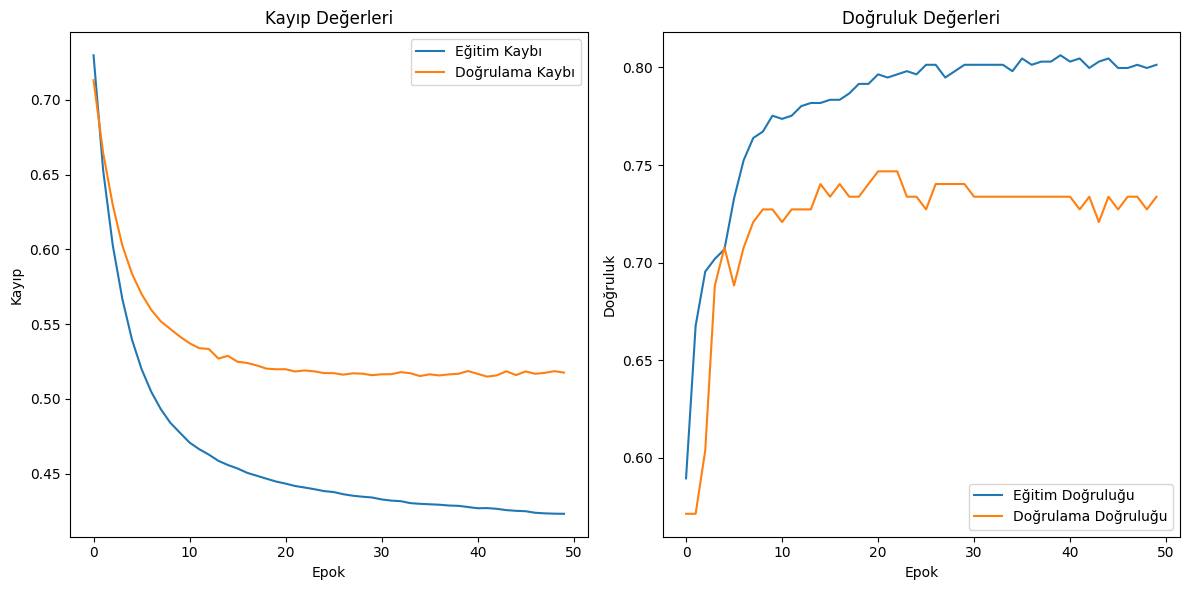

Doğruluk: 0.7337662337662337
F1-Skor: 0.6019417475728155


In [5]:
# Tahminler ve metrik hesaplama
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçların görselleştirilmesi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Kayıp grafiği
ax1.plot(history.history['loss'], label='Eğitim Kaybı')
ax1.plot(history.history['val_loss'], label='Doğrulama Kaybı')
ax1.set_title('Kayıp Değerleri')
ax1.set_xlabel('Epok')
ax1.set_ylabel('Kayıp')
ax1.legend()

# Doğruluk grafiği
ax2.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
ax2.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
ax2.set_title('Doğruluk Değerleri')
ax2.set_xlabel('Epok')
ax2.set_ylabel('Doğruluk')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Doğruluk: {accuracy}")
print(f"F1-Skor: {f1}")


In [6]:
optimizers = ['adam', 'sgd', 'rmsprop']
results = {}

for opt in optimizers:
    # Yeni model oluşturma
    model = Sequential([
        Dense(16, activation='relu', input_shape=(8,)),
        Dense(1, activation='sigmoid')
    ])

    # Modelin derlenmesi
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Modelin eğitilmesi
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)

    # Test setinde değerlendirme
    y_pred_proba = model.predict(X_test_scaled).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[opt] = {'accuracy': acc, 'f1_score': f1}

# Sonuçları yazdırma
for opt, metrics in results.items():
    print(f"{opt.upper()} - Accuracy: {metrics['accuracy']:.4f}, F1-Score: {metrics['f1_score']:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ADAM - Accuracy: 0.7208, F1-Score: 0.5905
SGD - Accuracy: 0.7078, F1-Score: 0.5631
RMSPROP - Accuracy: 0.7208, F1-Score: 0.5825
